# Reinforcement Learning

##強化學習(Reinforcement Learning)是人工智慧中策略學習的一種，透過觀測環境，並從環境中獲得最高的報酬率，方式有兩種：
###Upper Confidence Bound (UCB)。
###Thompson Sampling。


# Thompson Sampling Intuition
##1.是一種online decision algorithm，一般較常使用於對新用戶投放廣告的選擇(推薦系統)。
##2.根據歷史情況修正分佈的參數，而需要選擇的時候則對每個廣告的分布進行採樣，根據採樣結果排序來選擇廣告，保持較好的隨機性。
##3.步驟說明。




##(1)透過試驗歸算出廣告背後的機率分佈。
##(2)假設此機率分佈符合beta(wins,lose)分佈。
##(3)透過廣告現有的beta分佈產生隨機數。
##(4)選最大隨機數的那個廣告投放。

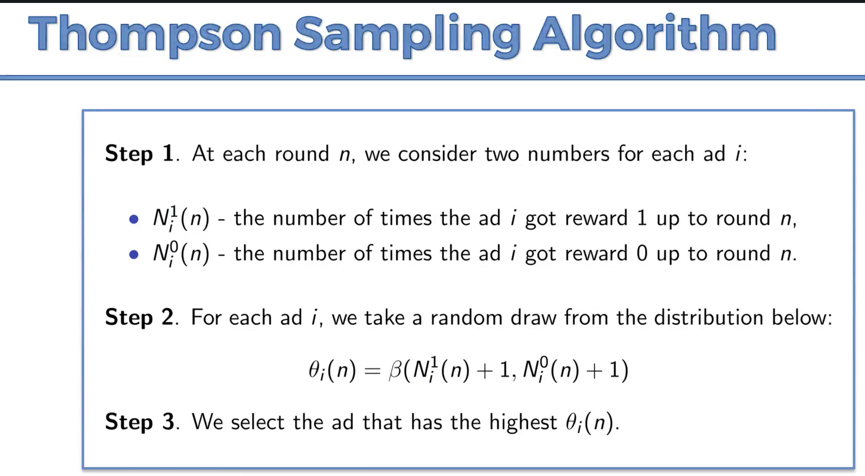

# Thompson Sampling
##範例中共有藍,綠,紅共三台機器，但我們並不知道實際上最佳化的回報率為多少，因此假設最佳化位置為中間桿子，依照取樣結果可得到每台機器的概率分佈。


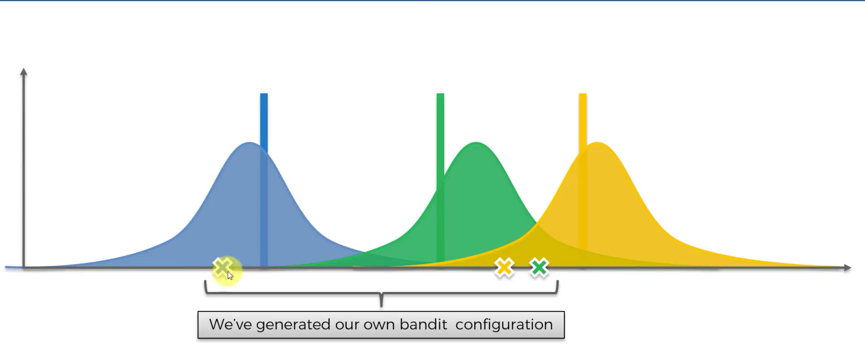

圖片 3.png

##從三項回報率中，選出最高的結果，從圖中可觀察為最右邊的綠色Ｘ。

##將該機台的回報率調整至平均回報率節點。

##經由不斷的嘗試，概率會不斷的往最佳化收斂，從圖中可觀測綠,黃為回報率較高的機台。

In [ ]:
圖五

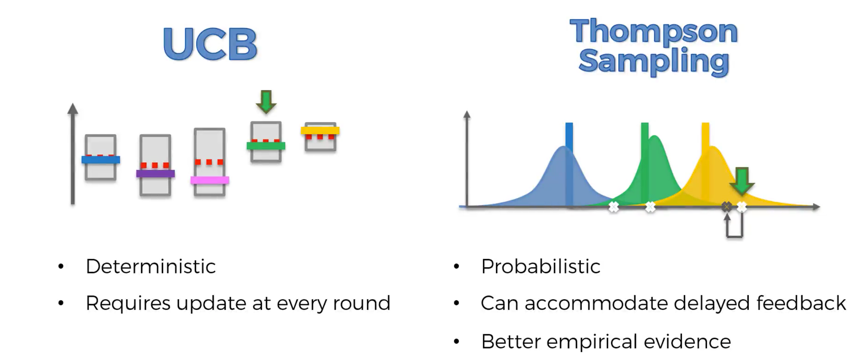


# UCB  VS  Thompson Sampling 

## UCB：預估值會受到平均報酬與信賴區間上界(UCB)所影響，隨著執行次數越多，則會讓預估值與UCB差距越小，也就越可信




# Thompson Sampling Algorithm
##資料預處理
###載入套件,匯入資料

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/Users/laikuanhung/Desktop/Daniel_aws/ML/Thompson_Sampling/Ads_CTR_Optimisation.csv')

###資料內容

In [ ]:
圖六

###設定變數

In [2]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

##建立模型
###執行每round後，每個ad都會產生出random_beta值，並選出最高值為此回合的推薦廣告
###若是預測成功，該廣告的win參數加1,若是預測失敗，該廣告的lost參數加1
###根據每一名客戶隨機選擇投放的廣告，去觀察這一萬名客戶的整體報酬，總投放回應的報酬約2569人

In [3]:
for n in range(0, N):
    ad = 0
    max_random = 0

    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]

    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
    

In [4]:
print(total_reward)

2569


###以圖像化的方式呈現每個廣告被選中的次數，從圖中可觀察廣告4被選中最多次．

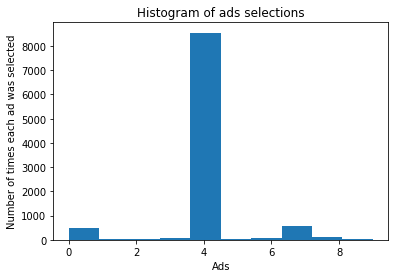

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [5]:

print(random_beta)# ,

# 
# ，
# ，
print(max_random)
print(ad)
print(ads_selected)
print(reward)
print(total_reward)
print(numbers_of_rewards_1)
print(numbers_of_rewards_0)

0.00607227518599
0.263540100487
4
[1, 5, 4, 8, 6, 0, 9, 4, 2, 5, 3, 0, 7, 7, 4, 2, 4, 0, 3, 1, 0, 4, 9, 5, 4, 7, 8, 7, 8, 8, 4, 9, 0, 8, 4, 6, 5, 4, 0, 4, 4, 4, 1, 4, 4, 3, 1, 8, 2, 6, 4, 4, 3, 7, 8, 9, 6, 4, 1, 0, 2, 7, 4, 4, 4, 4, 8, 6, 4, 4, 2, 7, 7, 8, 9, 4, 4, 1, 4, 0, 4, 0, 4, 4, 5, 4, 4, 3, 4, 0, 6, 4, 6, 6, 8, 3, 4, 7, 4, 4, 7, 0, 8, 4, 8, 5, 4, 4, 8, 3, 6, 7, 5, 4, 3, 4, 4, 8, 4, 4, 4, 2, 2, 3, 4, 4, 0, 7, 4, 4, 6, 4, 4, 1, 4, 8, 4, 4, 6, 4, 4, 6, 4, 4, 4, 6, 4, 4, 6, 4, 7, 8, 4, 4, 4, 4, 1, 8, 4, 4, 4, 5, 4, 4, 4, 4, 4, 9, 1, 4, 2, 6, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 7, 4, 9, 4, 5, 4, 4, 4, 4, 3, 4, 4, 4, 5, 4, 4, 7, 4, 7, 0, 5, 2, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 0, 4, 4, 4, 3, 0, 9, 2, 2, 4, 7, 4, 4, 8, 8, 4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 1, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 6, 4, 4, 4, 4, 0, 4, 0, 2, 4, 4, 9, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 8, 4, 4, 4, 4, 4, 4, 7, 0, 4, 3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0,